In [243]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [244]:
sns.set()
data = pd.read_csv("data_SF1.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['time_minutes'] = data['time'] / 60
data['frac'] = data['sol'].str.count("1")/40

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "nPop", "crossover", "errorLimit"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data2 = pd.read_csv("data_SF2.csv", dtype={'time':np.float64})

data2['error'] = [float(x[1:-1]) for x in data2['fbest']]
data2['time_minutes'] = data2['time'] / 60
data2['frac'] = data2['sol'].str.count("1")/40

data2 = data2.join(data2['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data2.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "nPop", "crossover", "errorLimit"], axis=1, inplace=True)
    
data2.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data.head()

,f1,grad,error,time_minutes,frac,1,2,3,4,5,6
0,100,200,18.187310,60.206599,0.300,56.355662,310.751524,516.120365,604.865634,1046.328342,1417.045043
1,100,300,6.161320,60.137436,0.275,93.821103,401.241796,696.275501,825.954968,1309.733208,1788.692693
2,100,400,7.127150,60.195766,0.375,114.251546,511.896583,898.284655,978.013406,1706.591523,2116.495668
3,100,500,9.769711,60.159196,0.500,133.410363,603.194085,1087.107486,1231.720968,2098.689522,2611.015302
4,100,600,12.474000,60.182150,0.650,138.832491,699.043949,1279.813775,1401.825229,2374.751221,3195.866528


In [245]:
data.describe()

,f1,grad,error,time_minutes,frac,1,2,3,4,5,6
count,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,225.00000,500.000000,11.125145,60.195947,0.557143,156.267536,733.282229,1193.429550,1408.884025,2050.583325,2850.944475
std,86.42634,202.424331,5.047477,0.051730,0.174108,45.653285,231.925876,383.099770,397.747931,593.530631,888.419472
min,100.00000,200.000000,1.359556,60.131302,0.275000,56.355662,310.751524,516.120365,604.865634,1045.137926,1417.045043
25%,150.00000,300.000000,7.182778,60.153862,0.387500,131.266807,553.819702,900.654084,1097.211789,1532.789133,2140.627473
50%,225.00000,500.000000,10.180060,60.191107,0.575000,161.147465,734.337418,1194.511518,1481.038683,2182.616199,2768.257156
75%,300.00000,700.000000,13.656897,60.225435,0.700000,200.266633,913.956909,1530.345985,1779.137579,2520.903213,3669.657524
max,350.00000,800.000000,20.224789,60.330369,0.825000,210.491724,1157.486316,1798.621976,1880.206005,2926.884934,4342.488885


### Grouping by first frequency

In [246]:
errors = data.drop(['time_minutes', 'frac'], axis=1)
errors.drop([x for x in errors.columns if type(x)==int], axis=1, inplace=True)

errors2 = data2.drop(['time_minutes', 'frac'], axis=1)
errors2.drop([x for x in errors2.columns if type(x)==int], axis=1, inplace=True)

errors.head()

,f1,grad,error
0,100,200,18.187310
1,100,300,6.161320
2,100,400,7.127150
3,100,500,9.769711
4,100,600,12.474000


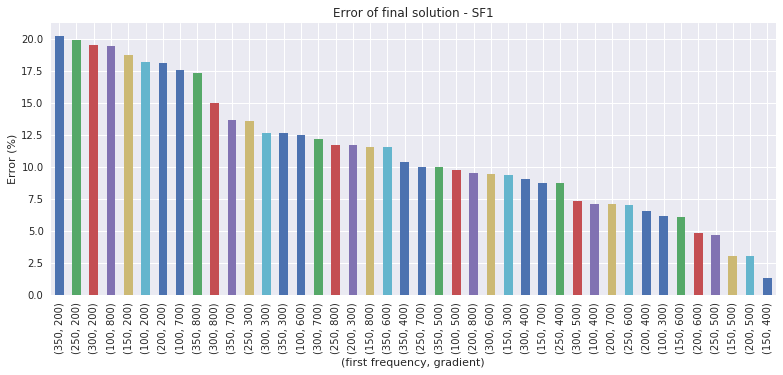

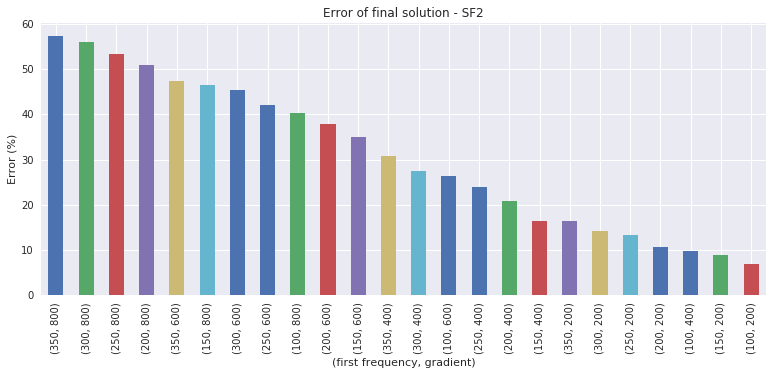

In [247]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (13,5)

ax = errors.sort_values(by="error", ascending=False).plot(kind="bar", x=['f1', 'grad'], y='error', legend=False)
plt.suptitle("")
plt.title("Error of final solution - SF1")
plt.xlabel("(first frequency, gradient)")
plt.ylabel("Error (%)")
plt.show()

ax = errors2.sort_values(by="error", ascending=False).plot(kind="bar", x=['f1', 'grad'], y='error', legend=False)
plt.suptitle("")
plt.title("Error of final solution - SF2")
plt.xlabel("(first frequency, gradient)")
plt.ylabel("Error (%)")
plt.show()

In [248]:
errors = errors.pivot("f1", "grad", "error")
errors2 = errors2.pivot("f1", "grad", "error")

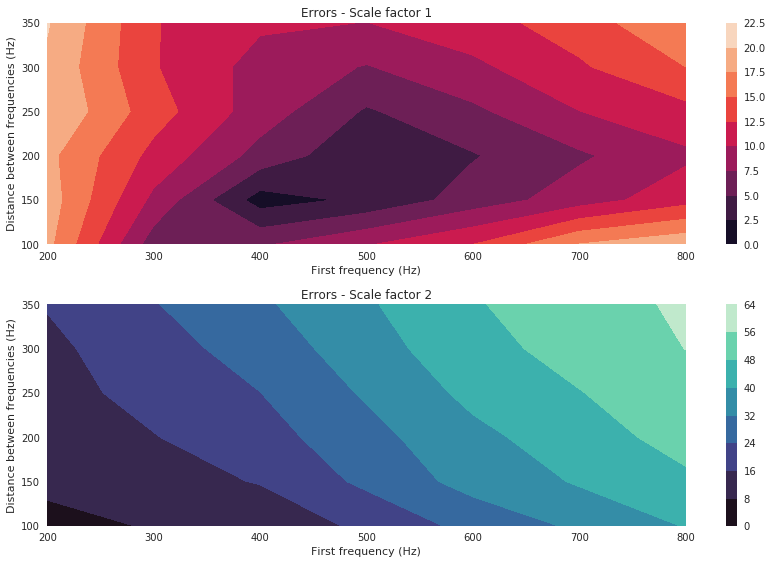

In [249]:
plt.figure(figsize=(12,8))

plt.subplot(211)
x = errors.columns.values
y = errors.index.values
Z = errors.values
X ,Y = np.meshgrid(x, y)
CS = plt.contourf(X, Y, Z)
plt.xlabel("First frequency (Hz)")
plt.ylabel("Distance between frequencies (Hz)")
plt.title("Errors - Scale factor 1")
plt.colorbar()

plt.subplot(212)
x2 = errors2.columns.values
y2 = errors2.index.values
Z2 = errors2.values
X2 ,Y2 = np.meshgrid(x2, y2)
CS2 = plt.contourf(X2, Y2, Z2, cmap="mako")
plt.xlabel("First frequency (Hz)")
plt.ylabel("Distance between frequencies (Hz)")
plt.title("Errors - Scale factor 2")
plt.colorbar()

plt.tight_layout()
plt.show()


In [250]:
E1 = 70e9
E0 = 3.5e9

p1 = 2700
p0 = 1.3e3

L = 0.1

errors_nd = data.drop(['time_minutes'], axis=1)
errors_nd.drop([x for x in errors_nd.columns if type(x)==int], axis=1, inplace=True)
factor = np.sqrt(((E1 - E0) * np.mean(errors_nd['frac']) + E0) / ((p1 - p0) * np.mean(errors_nd['frac']) + p0)) / L
errors_nd['f1'] = errors_nd['f1'] / factor
errors_nd['grad'] = errors_nd['grad'] / factor

errors2_nd = data2.drop(['time_minutes'], axis=1)
errors2_nd.drop([x for x in errors2_nd.columns if type(x)==int], axis=1, inplace=True)
factor = np.sqrt(((E1 - E0) * np.mean(errors2_nd['frac']) + E0) / ((p1 - p0) * np.mean(errors2_nd['frac']) + p0)) / (2*L)
errors2_nd['f1'] = errors2_nd['f1'] / factor
errors2_nd['grad'] = errors2_nd['grad'] / factor

errors_nd = errors_nd.drop(['frac'], axis=1)
errors2_nd = errors2_nd.drop(['frac'], axis=1)
errors_nd = errors_nd.pivot("f1", "grad", "error")
errors2_nd = errors2_nd.pivot("f1", "grad", "error")

errors_nd.head()

grad,0.004529666561848563,0.006794499842772844,0.009059333123697126,0.011324166404621408,0.013588999685545689,0.015853832966469972,0.018118666247394253
f1,,,,,,,
0.002265,18.187310,6.161320,7.127150,9.769711,12.474000,17.549535,19.453251
0.003397,18.784491,9.367299,1.359556,3.019046,6.112478,8.778090,11.564615
0.004530,18.148933,11.714313,6.592803,3.010249,4.811046,7.116653,9.509282
0.005662,19.903931,13.611821,8.749633,4.713197,6.999958,9.967522,11.726525
0.006794,19.503641,12.687297,9.044015,7.349662,9.426075,12.163395,14.984369


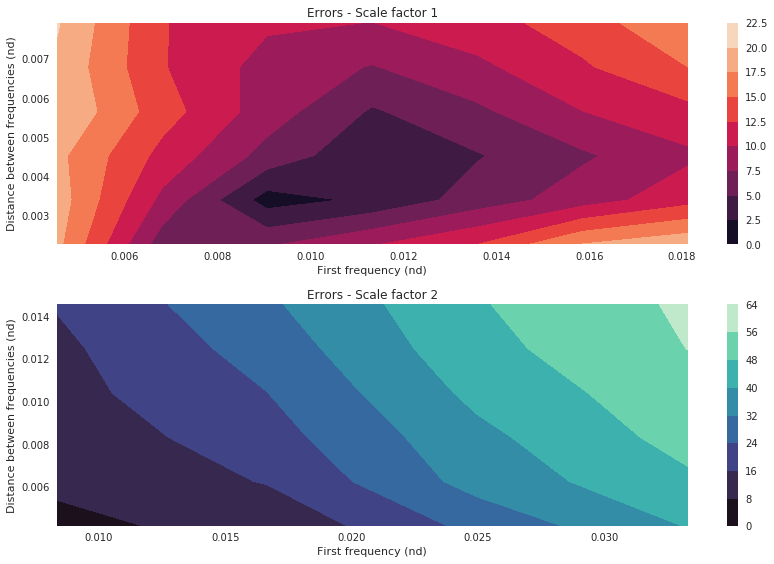

In [251]:
plt.figure(figsize=(12,8))

plt.subplot(211)
x = errors_nd.columns.values
y = errors_nd.index.values
Z = errors_nd.values
X ,Y = np.meshgrid(x, y)
CS = plt.contourf(X, Y, Z)
plt.xlabel("First frequency (nd)")
plt.ylabel("Distance between frequencies (nd)")
plt.title("Errors - Scale factor 1")
plt.colorbar()

plt.subplot(212)
x2 = errors2_nd.columns.values
y2 = errors2_nd.index.values
Z2 = errors2_nd.values
X2 ,Y2 = np.meshgrid(x2, y2)
CS2 = plt.contourf(X2, Y2, Z2, cmap="mako")
plt.xlabel("First frequency (nd)")
plt.ylabel("Distance between frequencies (nd)")
plt.title("Errors - Scale factor 2")
plt.colorbar()

plt.tight_layout()
plt.show()